In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [4]:

file= '/Users/ravendenise/Desktop/BotDet/TestingIG2_data - TestingIG_data.csv'

training_data = pd.read_csv(file)
bots = training_data[training_data['Real or Fake']==1]
nonbots = training_data[training_data['Real or Fake']==0]




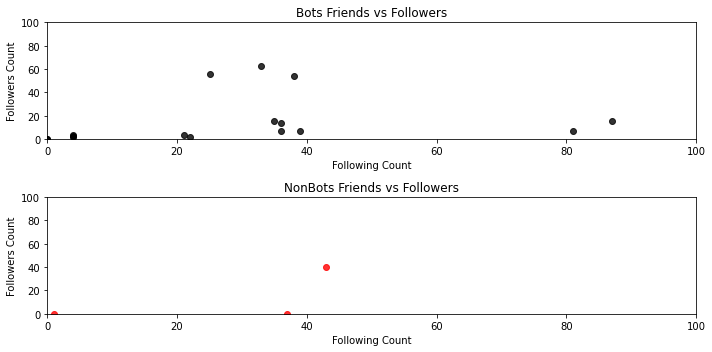

In [8]:
bots['Following Count']/bots['Followers Count']

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(x=bots['Following Count'], y=bots['Followers Count'], color='black', label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(x=nonbots['Following Count'], y=nonbots['Followers Count'], color='red', label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [16]:
filepath = '/User/ravendenise/Desktop/BotDet/TestingIG2_data - TestingIG_data.csv'
file= open('TestingIG2_data - TestingIG_data.csv', mode='r', encoding='utf-8', errors='ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'cash|help|sugar daddy|hacked|follow me|money|essay|forget|paypal|logo|nft|crypto|assignment|locked|sex|play|$|' \
                  
            #na =false sets nan values to false

training_data['Username'] = training_data['Username'].str.contains(bag_of_words_bot, case=False, na=False)
training_data['Bio'] = training_data['Bio'].str.contains(bag_of_words_bot, case=False, na=False)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

features = ['Username', 'Number of Posts', 'Followers Count', 'Following Count', 'Bio', 'Verified', 'Real or Fake']
X = training_data[features].iloc[:,:-1] #iloc gives us row,all column elements except the last one
y = training_data[features].iloc[:,-1] # iloc gives us row,only the last column element called bot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=5, min_samples_leaf=5)   
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9021739130434783